In [1]:
import numpy as np
import pandas as pd
import os
from glob import glob
from pprint import pprint
import json
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.collections import LineCollection
from matplotlib.colors import ListedColormap, BoundaryNorm
import matplotlib.pyplot as plt

import cellcycle.PlottingTools as plottingTools
from cellcycle.ParameterSet import ParameterSet
import cellcycle.DataStorage as dataStorage
import cellcycle.DataAnalysis as dataAnalysis
import cellcycle.MakeDataframe as makeDataframe
from cellcycle import mainClass

In [2]:
model = 'Full_model' # options 'LDDR' or 'LDDR_titration' or 'Full_model'
indx = 2 # specified growth rate, if 0 then low

In [3]:
file_path_input_params_json = '../../input_params.json'
input_param_dict = mainClass.extract_variables_from_input_params_json(file_path_input_params_json)
root_path = input_param_dict["DATA_FOLDER_PATH"]
simulation_location = 'SI/S14_LDDR_titration_SeqA/'+model
file_path = os.path.join(root_path, simulation_location)
print('file_path', file_path)
parameter_path = os.path.join(file_path, 'parameter_set.csv')
print('parameter_path', parameter_path)

file_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S14_LDDR_titration_SeqA/Full_model
parameter_path /home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S14_LDDR_titration_SeqA/Full_model/parameter_set.csv


# Make data frame from time traces

In [4]:
data_frame = makeDataframe.make_dataframe(file_path)
data_frame = data_frame.sort_values(by=['rate_growth'])

time_traces_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_time_traces')

v_init_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_init_events')
v_init = v_init_data_frame.iloc[-1]['v_init_per_ori']
v_init_per_ori = v_init_data_frame.iloc[-1]['v_init_per_ori']
t_init_list = v_init_data_frame['t_init'].to_numpy()

v_d_data_frame = pd.read_hdf(data_frame['path_dataset'].iloc[indx], key='dataset_div_events')
data_frame

['/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S14_LDDR_titration_SeqA/Full_model/S11_Full_model_2.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S14_LDDR_titration_SeqA/Full_model/S11_Full_model_1.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S14_LDDR_titration_SeqA/Full_model/S11_Full_model_0.pdf',
 '/home/berger/Data/UltrasensitivityCombined/Final_NatCom_Submission/SI/S14_LDDR_titration_SeqA/Full_model/LDDR_titation_SeqA']


,amplitude_oscillations,aspect_ratio,basal_rate_initiator,basal_rate_initiator_0,basal_rate_regulator,basal_rate_regulator_0,block_production,code_path,conc_0,continuous_oscillations,...,time_step,total_conc,underexpression_oscillations,v_0,v_init_th,version_of_coupled_division_regulation,version_of_independent_division_regulation,version_of_lipid_regulation,version_of_model,version_of_titration
0,30.0,4.0,346.573590,1000.0,24.260151,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,0.001,400.0,0,0.1,0.28,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator
2,30.0,4.0,1188.252310,1000.0,83.177662,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,0.001,400.0,0,0.1,0.28,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator
1,30.0,4.0,1663.553233,1000.0,116.448726,70.0,1,/home/berger/Documents/Arbeit/PhD/MyCode/Mecha...,400.0,1,...,0.001,400.0,0,0.1,0.28,cooper,IDA,proteome_sector,switch_titration,regulator_is_initiator


In [5]:
time = np.array(time_traces_data_frame["time"])
volume = np.array(time_traces_data_frame["volume"])
n_ori = np.array(time_traces_data_frame["n_ori"])
active_fraction = np.array(time_traces_data_frame["active_fraction"])
free_conc = np.array(time_traces_data_frame["free_conc"])
print(time.size)
cycle_0 = 8
cycle_f = cycle_0 + 3
t_0 = time[volume==v_d_data_frame['v_b'][cycle_0]]
indx_0 = np.where(time==t_0)[0][0]
t_f = time[volume==v_d_data_frame['v_b'][cycle_f]]
indx_f = np.where(time==t_f)[0][0]+10

print(indx_0, indx_f)

n_ori_cut = n_ori[indx_0:indx_f]
time_cut = time[indx_0:indx_f]
volume_cut = volume[indx_0:indx_f]
active_fraction_cut = active_fraction[indx_0:indx_f]
free_conc_cut = free_conc[indx_0:indx_f]

t_init_list_cut_1 = t_init_list[t_init_list>t_0]
t_init_list_cut = t_init_list_cut_1[t_init_list_cut_1<t_f]
t_b = t_init_list + data_frame.iloc[indx]['t_CD']
t_b_cut_1 = t_b[t_b<t_f]
t_b_cut = t_b_cut_1[t_b_cut_1>t_0]
print(t_init_list_cut, t_b_cut)

12500
5246 6507
[5.495 5.912 6.329] [5.661 6.078 6.495]


# Color definitions

In [6]:
pinkish_red = (247 / 255, 109 / 255, 109 / 255)
green = (0 / 255, 133 / 255, 86 / 255)
dark_blue = (36 / 255, 49 / 255, 94 / 255)
light_blue = (168 / 255, 209 / 255, 231 / 255)
darker_light_blue = (112 / 255, 157 / 255, 182 / 255)
blue = (55 / 255, 71 / 255, 133 / 255)
yellow = (247 / 255, 233 / 255, 160 / 255)

# Plot three figures

t_start: 5.663
0.4166666666666667
t_end: 6.08
indices: 5663 6080
2.4
number of titration sites per origin: 300.0


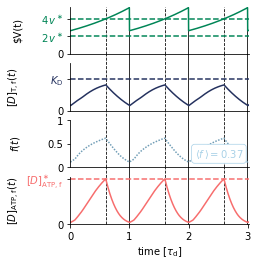

In [7]:
label_list = [r'$V(t)', r'$[D]_{\rm T, f}(t)$', r'$f(t)$', r'$[D]_{\rm ATP, f}(t)$']
x_axes_list = [time_cut, time_cut, time_cut, time_cut]
y_axes_list = [volume_cut, free_conc_cut, active_fraction_cut, free_conc_cut * active_fraction_cut]
legend_bool_list = [0, 0, 1, 0]
legend_list = [' ', ' ', r'$\langle f \, \rangle = {}$'.format(np.round(dataAnalysis.calculate_average_active_fraction(data_frame, cycle_0, indx), 2))]
color_list = [green, dark_blue, darker_light_blue, pinkish_red]
fig, ax = plt.subplots(4, figsize=(3.2,4))
plt.xlabel(r'time [$\tau_{\rm d}$]')
y_min_list = [0,0,0,0]
y_max_list = [1, 1.2, 1.2, 1.2]

doubling_time = 1/data_frame.iloc[indx]['doubling_rate']
print(1/doubling_time)
print('number of titration sites per origin:', data_frame.iloc[indx]['n_c_max_0'])
for item in range(0, len(label_list)):
    ax[item].set_ylabel(label_list[item])
    ax[item].plot(x_axes_list[item], y_axes_list[item], color=color_list[item])
    if legend_bool_list[item] == 1:
        ax[item].annotate(legend_list[item],xy=(148.5, 7), xycoords='axes points', ha='center', va='bottom', 
            bbox=dict(boxstyle='round', lw=0.7, fc='w',pad=0.3, color=light_blue), color=light_blue)
    ax[item].set_ylim(ymin=0)
    ax[item].tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax[item].spines["top"].set_visible(False)
    ax[item].spines["right"].set_visible(False)
    ax[item].margins(0)
    for t_div in t_b_cut:
        ax[item].axvline(x=t_div, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          clip_on=False)
    for t_init in t_init_list_cut:
        ax[item].axvline(x=t_init, 
                          ymin=y_min_list[item],
                          ymax=y_max_list[item],
                             c="black",
                          zorder=0, 
                          linewidth=0.8,
                          linestyle='--',
                          clip_on=False)

if indx==0:
    ax[0].set_yticks([0, v_init])
    ax[0].set_yticklabels(['0',r'$v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].axhline(y=v_init, color=green, linestyle='--')
    
if indx==1:
    ax[0].set_yticks([0, v_init, 2*v_init])
    ax[0].set_yticklabels(['0',r'$v^\ast$',r'$2 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=v_init, color=green, linestyle='--')
    ax[0].axhline(y=2 * v_init, color=green, linestyle='--')
    
if indx==2:
    ax[0].set_yticks([0, 2 * v_init, 4*v_init])
    ax[0].set_yticklabels(['0',r'$2 \, v^\ast$',r'$4 \, v^\ast$'])
    ax[0].get_yticklabels()[1].set_color(green)
    ax[0].get_yticklabels()[2].set_color(green)
    ax[0].axhline(y=2 * v_init, color=green, linestyle='--')
    ax[0].axhline(y=4 * v_init, color=green, linestyle='--')
    
# ax[0].set_yticks([0, v_init_per_ori, 2*v_init_per_ori, 4*v_init_per_ori])
# # ax[0].set(ylim=(0, v_init+0.01))
# ax[0].set_yticklabels(['0',r'$v^\ast$',r'$2 \,v^\ast$',r'$4 \, v^\ast$'])
# ax[0].get_yticklabels()[1].set_color(green)
# ax[0].get_yticklabels()[2].set_color(green)
# ax[0].get_yticklabels()[3].set_color(green)
# ax[0].axhline(y=v_init, color=green, linestyle='--')

ax[1].axhline(y=data_frame.iloc[0]['michaelis_const_initiator'], color=color_list[1], linestyle='--')
ax[1].set_yticks([0, data_frame.iloc[0]['michaelis_const_initiator']])
ax[1].set_yticklabels([0, r'$K_{\rm D}$'])
ax[1].get_yticklabels()[1].set_color(color_list[1])
ax[1].set(ylim=(0,data_frame.iloc[0]['michaelis_const_initiator']*1.5))


# ax[2].axhline(y=data_frame.iloc[0]['frac_init'], color=pinkish_red, linestyle='--')
ax[2].set_yticks([0, 0.5, 1])
ax[2].set_yticklabels(['0', '0.5', '1'])
ax[2].lines[0].set_linestyle((0, (1, 1)))

ax[3].set_yticks([0, data_frame.iloc[0]['critical_free_active_conc']])
ax[3].set_yticklabels(['0',r'$[D]_{\rm ATP, f}^\ast$'])
ax[3].get_yticklabels()[1].set_color(color_list[3])
if model == 'LDDR':
    ax[3].axhline(y=data_frame.iloc[0]['init_conc'], color=color_list[3], linestyle='--')
else:
    ax[3].axhline(y=data_frame.iloc[0]['critical_free_active_conc'], color=color_list[3], linestyle='--')
ax[3].tick_params(bottom=True, labelbottom=True)
ax[3].tick_params(axis='x', colors='black')
ax[3].set_xticks([time_cut[0], 
                  time_cut[0]+ doubling_time, 
                  time_cut[0]+ 2*doubling_time,
                  time_cut[0]+ 3*doubling_time
                 ])
ax[3].set_xticklabels(['0', '1', '2', '3'])
fig.align_ylabels()
plt.savefig(file_path + '/S11_'+model+'_'+str(indx)+'.pdf', format='pdf',bbox_inches='tight')